# Optimization

Optimzation asks us to:

Find $x$ that minimizes $f(\vec{x}$) subject to $\vec{g}(\vec{x}) = 0$ and $\vec{h}(\vec{x})\ge 0$

* $f$ is the *objective* function and typically a scalar
* $\vec{g}(\vec{x})$ is a list of *equality constraints*
* $\vec{h}(\vec{x})$ is a list of *inequality constraints*
* Maximization for $f$ is mearly minimization of $-f$.
* Optimization differs from root finding in the constraints and smoothness of $f$.

We saw with root finding that using gradient information to help search algorithms has important benefits. That remains true in optimization, but since they are often *high dimensional* ($\vec{x}$ is a large vector), and $f$ is not necessarily *well behaved*, great value is placed on methods that do not require (direct) gradient / Hessian calculations.

## Local vs Global minima


Even in 1D, optimization is confounded by *local minimima*. The lowest of the local minima is the *global minimum*.

There is no good way to ensure a local minimia is a global one without calculating and comparing them all!

There are lots of algorithms that attempt to find the global minimum. They either:
* launch multiple minimizers over the range of arguments
* typically involve preturbing *good* solutions in an attempt to escape from local minima basins.

Interestingly, many of these methods are modelled after nature! (Why?)
* Genetic algorithms - mutations, cross-overs, selection)
* Simulated annealing - metalurgical process that accepts worse solutions)
* Partical swarm - Mimics swarming behaviour to track multiple solutions
* Amoeba search (which we will talk about)

Introduction of constraints can further complicate things since sometimes the minimima is at a bound!

#### Example: local and global minimima

Minimize $f = x^2 - cos(5 x)$

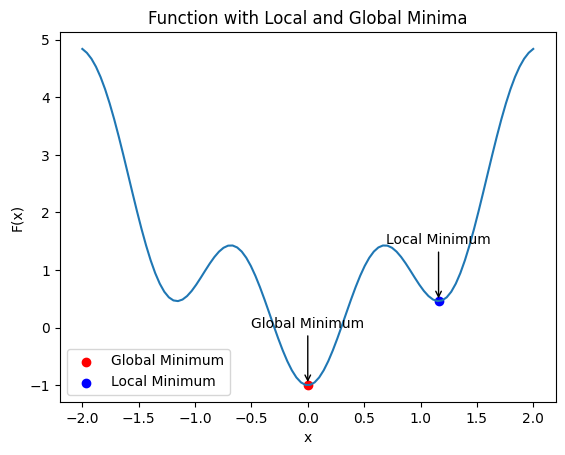

In [ ]:
# prompt: Draw a function with a clear local and global minima, labelled

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

x = np.linspace(-2, 2, 100)
f = lambda x: x**2 + -np.cos(5 * x)
y = f(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Function with Local and Global Minima")

# Annotate the global minimum
plt.scatter(0, np.min(y), color='red', label='Global Minimum')
plt.annotate('Global Minimum', xy=(0, np.min(y)), xytext=(0, np.min(y) + 1), ha='center', arrowprops=dict(arrowstyle='->'))

# Annotate a local minimum (approximately)
opt =  sp.optimize.minimize(f,1)
local_min_x = opt.x
local_min_y = opt.fun
plt.scatter(local_min_x, local_min_y, color='blue', label='Local Minimum')
plt.annotate('Local Minimum', xy=(local_min_x, local_min_y), xytext=(local_min_x, local_min_y + 1), ha='center', arrowprops=dict(arrowstyle='->'))

plt.legend()
plt.show()


#### Example: Eggholder surfaces

Minimize $y \cdot sin(\sqrt{\|x + y\|}) + x \cdot sin(\sqrt{\|x - y\|})$

In [ ]:
11# prompt: Draw a 2D eggholder surface using plotly

import plotly.graph_objects as go
import numpy as np

def eggholder(x, y):
  return y* np.sin(np.sqrt(abs(x + y ))) + x * np.sin(np.sqrt(abs(x - y)))


x = np.linspace(-512, 512, 100)
y = np.linspace(-512, 512, 100)
X, Y = np.meshgrid(x, y)
Z = eggholder(X, Y)/10

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Eggholder Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


#### Example: Constrained minimization

Minimize $x^2+x$ such that $\|x\| \le 1$

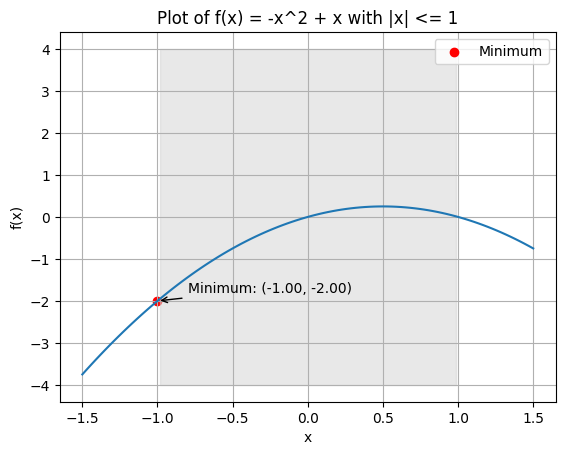

In [ ]:
# prompt: Plot -x^2+x and find the minimum with |x|\le 1 and show the minimium

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize

# Define the function
def f(x):
  return -x**2 + x

# Define the bounds for x
bounds = (-1, 1)

# Create a range of x values
x = np.linspace(-1.5, 1.5, 100)

# Calculate the corresponding y values
y = f(x)

# Find the minimum using scipy.optimize.minimize_scalar
result = optimize.minimize_scalar(f, bounds=bounds)

# Get the x value of the minimum
x_min = result.x

# Get the y value of the minimum
y_min = f(x_min)


# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = -x^2 + x with |x| <= 1')

# Plot the minimum
plt.scatter(x_min, y_min, color='red', label='Minimum')
plt.annotate(f'Minimum: ({x_min:.2f}, {y_min:.2f})', xy=(x_min, y_min), xytext=(x_min + 0.2, y_min + 0.2), arrowprops=dict(arrowstyle='->'))

plt.fill_between(x, -4, 4, where=(np.abs(x) <= 1), color='lightgray', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()
